<a href="https://colab.research.google.com/github/Abhisekdassleek/abhisekdas/blob/main/Akridata_ML_Intern_May24_Coding_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

* Make a copy of this notebook in your drive (File -> Make a copy in Drive).
* Complete the following problem statement.
* Ensure that the link to this notebook is public - open it in a browser where you're not logged in and verify that its contents can be seen. This must include the outputs of each cell, including the final plot.
* Share the link to the Colab notebook in the internship application form: https://docs.google.com/forms/d/e/1FAIpQLSc6-VTEfIrykx0EeYtUR4ykd0DSu4k9Jp7DgjDHtaqklnw3Pw/viewform?usp=sf_link
* Feel free to use any resource (including GPT-like tools) to complete this assignment, as long as you do it by yourself and understand what is done.

**Do not share your solution publicly until the end of April!** It will reduce your chances of being selected if others copy your solution. You are free to post your solution publicly on your portfolio after April.

Don't submit queries to us about this assignment - you are expected to understand this from the limited information in the problem statement.


## Problem statement

Investigate the effect of training set size on the classification performance for the MNIST-Fashion dataset.

1. Download the dataset from any source you prefer.
2. Display a few example images from the dataset.
3. Write a function to sample subsets of different sizes (starting from 0.1% to 10%) from the training split.
4. On each sampled subset
    1. Train a classifier. Hint: Flatten image pixels, then PCA, then kNN.
    2. Score the classifier on the test set
5. Plot the test accuracy (y-axis) against the training set size (x-axis)


## How is this scored?

Your submission will be scored on 3 dimensions:

1. Completion: Did you solve the problem?
2. Style: Is your code well written and organized?
3. Presentation: Do you describe each step of the process, and connect logically from one section to the next?

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_lables),(test_images, test_lables) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_lables

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
len(test_lables)

10000

In [7]:
test_lables

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

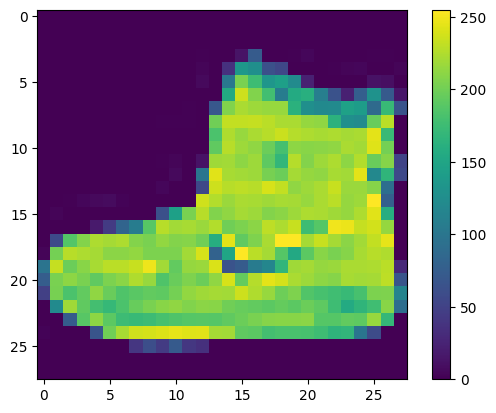

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)


In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

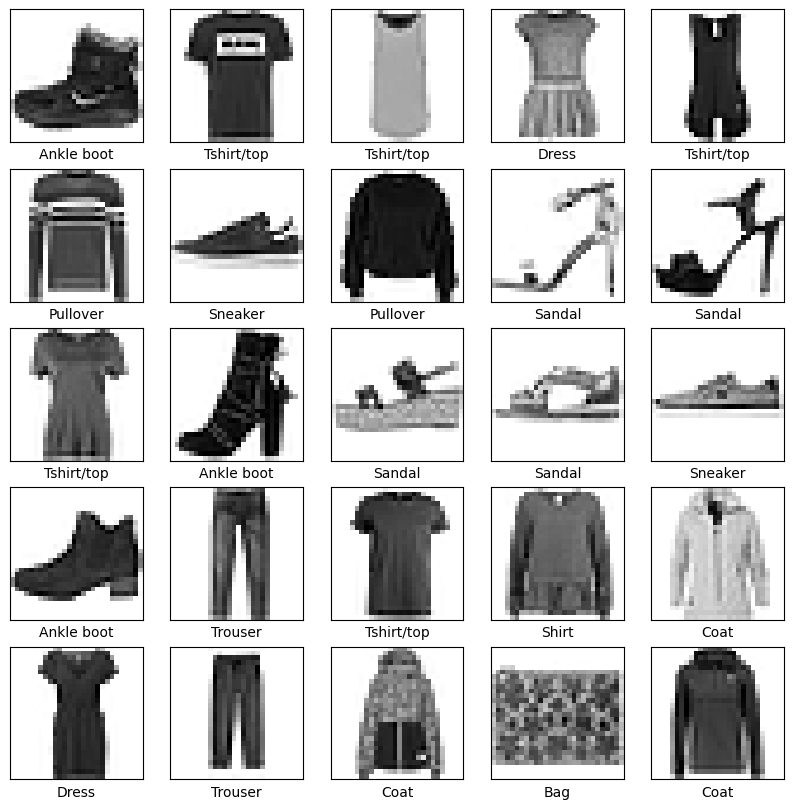

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i],cmap = plt.cm.binary)
  plt.xlabel(class_names[train_lables[i]])

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Use the Adam optimizer from keras.optimizers
    loss='sparse_categorical_crossentropy',  # Use the sparse categorical crossentropy loss function
    metrics=['accuracy']  # Track the accuracy metric during training and testing
)

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Use the Adam optimizer from keras.optimizers
    loss='sparse_categorical_crossentropy',  # Use the sparse categorical crossentropy loss function
    metrics=['accuracy']  # Track the accuracy metric during training and testing
)

In [14]:
model.fit(train_images, train_lables,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5000 - accuracy: 0.8235
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3743 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3355 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3117 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8905


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_lables)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8805
0.8805000185966492


In [16]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 954us/step


In [17]:
predictions[0]

array([5.52354049e-06, 1.26295916e-07, 8.64050520e-08, 1.78244672e-08,
       1.87963309e-07, 4.05490072e-03, 6.25490975e-06, 1.17057830e-01,
       1.01638625e-05, 8.78864884e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_lables[0]

9

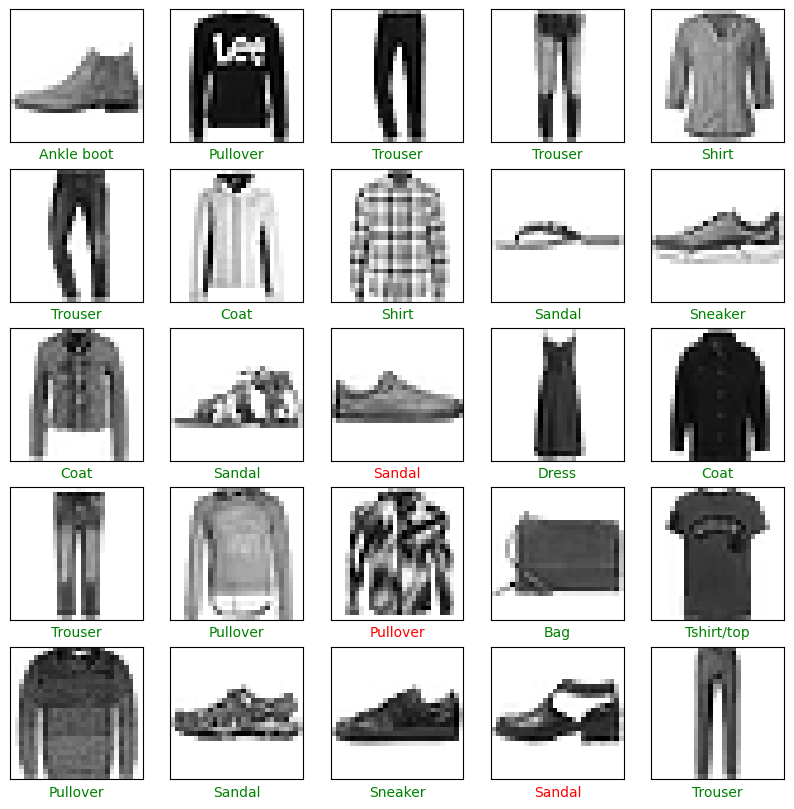

In [20]:
# prompt: # Plot the first 25 test images, their predicted label, and the true label
# # Color correct predictions in green, incorrect predictions in red.

import matplotlib.pyplot as plt

# Plot the first 25 test images, their predicted label, and the true label
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    # Get the predicted label for the current image
    predicted_label = np.argmax(predictions[i])

    # Color the prediction green if it's correct, red otherwise
    if predicted_label == test_lables[i]:
        plt.xlabel(class_names[predicted_label], color='green')
    else:
        plt.xlabel(class_names[predicted_label], color='red')

    plt.imshow(test_images[i], cmap=plt.cm.binary)

plt.show()

In [21]:
img = test_images[0]
print(img.shape)

(28, 28)


In [22]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [23]:
prediction = model.predict(img)
print(prediction)

1/1 [==============================] - 0s 13ms/step
[[5.5235400e-06 1.2629590e-07 8.6405201e-08 1.7824499e-08 1.8796329e-07
  4.0549077e-03 6.2549152e-06 1.1705793e-01 1.0163860e-05 8.7886477e-01]]


In [24]:
prediction = predictions[0]
np.argmax(prediction)

9